#**Question 1**

In [ ]:
# Step 1. Import the necessary libraries

import pandas as pd
import requests

In [ ]:
# Step 2. Import the dataset from this dataset

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
res = requests.get(url)
data = ''
data = res.content if res.status_code == 200 else print(f'ERROR!\n{res.status_code}')
print(data)

b'user_id|age|gender|occupation|zip_code\n1|24|M|technician|85711\n2|53|F|other|94043\n3|23|M|writer|32067\n4|24|M|technician|43537\n5|33|F|other|15213\n6|42|M|executive|98101\n7|57|M|administrator|91344\n8|36|M|administrator|05201\n9|29|M|student|01002\n10|53|M|lawyer|90703\n11|39|F|other|30329\n12|28|F|other|06405\n13|47|M|educator|29206\n14|45|M|scientist|55106\n15|49|F|educator|97301\n16|21|M|entertainment|10309\n17|30|M|programmer|06355\n18|35|F|other|37212\n19|40|M|librarian|02138\n20|42|F|homemaker|95660\n21|26|M|writer|30068\n22|25|M|writer|40206\n23|30|F|artist|48197\n24|21|F|artist|94533\n25|39|M|engineer|55107\n26|49|M|engineer|21044\n27|40|F|librarian|30030\n28|32|M|writer|55369\n29|41|M|programmer|94043\n30|7|M|student|55436\n31|24|M|artist|10003\n32|28|F|student|78741\n33|23|M|student|27510\n34|38|F|administrator|42141\n35|20|F|homemaker|42459\n36|19|F|student|93117\n37|23|M|student|55105\n38|28|F|other|54467\n39|41|M|entertainment|01040\n40|38|M|scientist|27514\n41|33|M|

In [ ]:
# Step 3. Assign it to a variable called users

lines = data.decode('utf-8').splitlines()
heading = lines[0].split('|')
data = [line.split('|') for line in lines[1:]]
users = pd.DataFrame(columns=heading, data = data)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
# Step 4. Discover what is the mean age per occupation

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    object
 1   age         943 non-null    object
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: object(5)
memory usage: 37.0+ KB


In [ ]:
users['age'] = users['age'].astype(int)

In [ ]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean().reset_index()
mean_age_per_occupation.columns = ['Occupation', 'Mean Age']
print("Mean age per occupation:\n", mean_age_per_occupation.to_string(index=False))


Mean age per occupation:
    Occupation  Mean Age
administrator 38.746835
       artist 31.392857
       doctor 43.571429
     educator 42.010526
     engineer 36.388060
entertainment 29.222222
    executive 38.718750
   healthcare 41.562500
    homemaker 32.571429
       lawyer 36.750000
    librarian 40.000000
    marketing 37.615385
         none 26.555556
        other 34.523810
   programmer 33.121212
      retired 63.071429
     salesman 35.666667
    scientist 35.548387
      student 22.081633
   technician 33.148148
       writer 36.311111


In [ ]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

male_ratio_per_occupation = (users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count()).reset_index()
male_ratio_per_occupation.columns = ['Occupation', 'Male Ratio']
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(by='Male Ratio', ascending=False)
print("Most to least male ratio per occupation:\n", male_ratio_per_occupation.to_string(index=False))

Most to least male ratio per occupation:
    Occupation  Male Ratio
       doctor    1.000000
     engineer    0.970149
   technician    0.962963
      retired    0.928571
   programmer    0.909091
    executive    0.906250
    scientist    0.903226
entertainment    0.888889
       lawyer    0.833333
     salesman    0.750000
     educator    0.726316
      student    0.693878
        other    0.657143
    marketing    0.615385
       writer    0.577778
         none    0.555556
administrator    0.544304
       artist    0.535714
    librarian    0.431373
   healthcare    0.312500
    homemaker    0.142857


In [ ]:
# Step 6. For each occupation, calculate the minimum and maximum ages

age_stats_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max']).reset_index()
age_stats_by_occupation.columns = ['Occupation', 'Min Age', 'Max Age']
print("Age statistics by occupation:\n", age_stats_by_occupation.to_string(index=False))

Age statistics by occupation:
    Occupation  Min Age  Max Age
administrator       21       70
       artist       19       48
       doctor       28       64
     educator       23       63
     engineer       22       70
entertainment       15       50
    executive       22       69
   healthcare       22       62
    homemaker       20       50
       lawyer       21       53
    librarian       23       69
    marketing       24       55
         none       11       55
        other       13       64
   programmer       20       63
      retired       51       73
     salesman       18       66
    scientist       23       55
      student        7       42
   technician       21       55
       writer       18       60


In [ ]:
# Step 7. For each combination of occupation and sex, calculate the mean age

mean_age_by_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()
mean_age_by_occupation_sex.columns = ['Occupation', 'Gender', 'Mean Age']
print("Mean age for each combination of occupation and sex:\n", mean_age_by_occupation_sex.to_string(index=False))

Mean age for each combination of occupation and sex:
    Occupation Gender  Mean Age
administrator      F 40.638889
administrator      M 37.162791
       artist      F 30.307692
       artist      M 32.333333
       doctor      M 43.571429
     educator      F 39.115385
     educator      M 43.101449
     engineer      F 29.500000
     engineer      M 36.600000
entertainment      F 31.000000
entertainment      M 29.000000
    executive      F 44.000000
    executive      M 38.172414
   healthcare      F 39.818182
   healthcare      M 45.400000
    homemaker      F 34.166667
    homemaker      M 23.000000
       lawyer      F 39.500000
       lawyer      M 36.200000
    librarian      F 40.000000
    librarian      M 40.000000
    marketing      F 37.200000
    marketing      M 37.875000
         none      F 36.500000
         none      M 18.600000
        other      F 35.472222
        other      M 34.028986
   programmer      F 32.166667
   programmer      M 33.216667
      retired   

In [ ]:
# Step 8. For each occupation present the percentage of women and men

gender_percentage_by_occupation = users.groupby(['occupation', 'gender']).size() / users.groupby('occupation').size()
gender_percentage_by_occupation = gender_percentage_by_occupation.unstack(fill_value=0) * 100
gender_percentage_by_occupation.reset_index(inplace=True)
gender_percentage_by_occupation.columns = ['Occupation', 'Female Percentage', 'Male Percentage']
print("Percentage of women and men for each occupation:\n", gender_percentage_by_occupation.to_string(index=False))

Percentage of women and men for each occupation:
    Occupation  Female Percentage  Male Percentage
administrator          45.569620        54.430380
       artist          46.428571        53.571429
       doctor           0.000000       100.000000
     educator          27.368421        72.631579
     engineer           2.985075        97.014925
entertainment          11.111111        88.888889
    executive           9.375000        90.625000
   healthcare          68.750000        31.250000
    homemaker          85.714286        14.285714
       lawyer          16.666667        83.333333
    librarian          56.862745        43.137255
    marketing          38.461538        61.538462
         none          44.444444        55.555556
        other          34.285714        65.714286
   programmer           9.090909        90.909091
      retired           7.142857        92.857143
     salesman          25.000000        75.000000
    scientist           9.677419        90.322581


#**Question 2**

In [ ]:
# Step 1. Import the necessary libraries

import pandas as pd
import requests
from io import StringIO

In [ ]:
# Step 2. Import the dataset from this dataset

url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
res = requests.get(url)
data = ''
data = res.content if res.status_code == 200 else print(f'ERROR!\n{res.status_code}')
print(data)

b'Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used\nCroatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,,0,10,3,13,81.3%,41,62,2,9,0,9,9,16\nCzech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2,1,10,6,9,60.1%,53,73,8,7,0,11,11,19\nDenmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0,1,10,5,10,66.7%,25,38,8,4,0,7,7,15\nEngland,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1,2,29,3,22,88.1%,43,45,6,5,0,11,11,16\nFrance,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,

In [ ]:
# Step 3. Assign it to a variable called euro12

lines = data.decode('utf-8').splitlines()
headings = lines[0].split(',')
data = [line.split(',') for line in lines[1:]]
euro12 = pd.DataFrame(columns = headings, data = data)
pd.set_option('display.max_columns', None)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,,0,10,3,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2,1,10,6,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0,1,10,5,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1,2,29,3,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0,1,7,5,6,54.6%,36,51,5,6,0,11,11,19


In [ ]:
# Step 4. Select only the Goal column

euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: object

In [ ]:
# Step 5. How many team participated in the Euro2012?

print(f"Number of Teams participated in the Euro 2012 : {euro12['Team'].nunique()}")

Number of Teams participated in the Euro 2012 : 16


In [ ]:
# Step 6. What is the number of columns in the dataset?

print(f'Number of Columns in the dataset : {len(euro12.columns)}')

Number of Columns in the dataset : 35


In [ ]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [ ]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(by=['Red Cards','Yellow Cards'], ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0
12,Russia,6,0
3,England,5,0
8,Netherlands,5,0


In [ ]:
# Step 9. Calculate the mean Yellow Cards given per Team

mean_yellow_cards_per_team_mean = discipline['Yellow Cards'].mean()
print(f"Mean Yellow Cards given per Team : {mean_yellow_cards_per_team_mean}")

Mean Yellow Cards given per Team : 6.091030728570413e+17


In [ ]:
# Step 10. Filter teams that scored more than 6 goals

euro12['Goals'] = pd.to_numeric(euro12['Goals'], errors='coerce')
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,2,4317,3820,88.4%,5585,69,106,44,122,102,79,0,5,8,1,15,93.8%,102,83,19,11,0,17,17,18


In [ ]:
# Step 11. Select the teams that start with G

euro12[euro12['Team'].str[0] == 'G']

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0,1,23,7,13,65.1%,67,48,12,9,1,12,12,20


In [ ]:
# Step 12. Select the first 7 column

euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [ ]:
# Step 13. Select all columns except the last 3

euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,3016,2531,83.9%,4363,75,75,30,98,137,136,1,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,1556,1381,88.7%,2163,50,49,22,34,41,41,0,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,1,1059,852,80.4%,1724,55,39,14,67,87,62,0,0,8,3,6,66.7%,48,56,3,7,1


In [ ]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

euro12[euro12['Team'].isin(['England','Italy','Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


#**Question 3**

In [ ]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

In [ ]:
'''Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000'''

s1 = pd.Series(np.random.randint(1, 5, size=100))

s2 = pd.Series(np.random.randint(1, 4, size=100))

s3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [ ]:
print('Series 1 :')
s1.head()

Series 1 :


0    2
1    2
2    1
3    3
4    1
dtype: int64

In [ ]:
print('Series 2 :')
s2.head()

Series 2 :


0    3
1    1
2    3
3    2
4    1
dtype: int64

In [ ]:
print('Series 3 :')
s3.head()

Series 3 :


0    26065
1    22159
2    26611
3    21175
4    10438
dtype: int64

In [ ]:
# Step 3. Create a DataFrame by joinning the Series by column

combined_series = pd.concat([s1, s2, s3], axis=1, keys=['Series 1', 'Series 2', 'Series 3'])
combined_series

,Series 1,Series 2,Series 3
0,2,3,26065
1,2,1,22159
2,1,3,26611
3,3,2,21175
4,1,1,10438
...,...,...,...
95,1,1,24094
96,3,1,23090
97,4,3,19122
98,1,3,14190


In [ ]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

combined_series.columns = ['bedrs','bathrs','price_sqr_meter']
combined_series.head()

,bedrs,bathrs,price_sqr_meter
0,2,3,26065
1,2,1,22159
2,1,3,26611
3,3,2,21175
4,1,1,10438


In [ ]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn = pd.concat([s1, s2, s3], axis=0)

# Create a DataFrame with the 'bigcolumn' Series
big_df = pd.DataFrame({'bigcolumn': bigcolumn})

# Print the first few rows of the DataFrame
print(big_df)

    bigcolumn
0           2
1           2
2           1
3           3
4           1
..        ...
95      24094
96      23090
97      19122
98      14190
99      19732

[300 rows x 1 columns]


In [ ]:
# Step 6. Ops it seems it is going only until index 99. Is it true?

big_df.size

300

In [ ]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299

big_df.reset_index(drop=True,inplace = True)
big_df

,bigcolumn
0,2
1,2
2,1
3,3
4,1
...,...
295,24094
296,23090
297,19122
298,14190


#**Question 4**

In [ ]:
# Step 1. Import the necessary libraries

import pandas as pd
from io import StringIO

In [ ]:
# Step 2. Import the dataset from the attached file wind.txt

with open('wind.txt','r') as file:
  content = file.read()
content

'Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n61  1  4 10.58  6.63 11.75  4.58  4.54  2.88  8.63  1.79  5.83  5.88  5.46 10.88\n61  1  5 13.33 13.25 11.42  6.17 10.71  8.21 11.92  6.54 10.92 10.34 12.92 11.83\n61  1  6 13.21  8.12  9.96  6.67  5.37  4.50 10.67  4.42  7.17  7.50  8.12 13.17\n61  1  7 13.50 14.29  9.50  4.96 12.29  8.33  9.17  9.29  7.58  7.96 13.96 13.79\n61  1  8 10.96  9.75  7.62  5.91  9.62  7.29 14.29  7.62  9.25 10.46 16.62 16.46\n61  1  9 12.58 10.83 10.00  4.75 10.37  6.79  8.04 10.13  7.79  9.08 13.04 15.37\n61  1 10 13.37 11.12 19.50  8.33  9.71  6.54 11.42  7.79  8.54  9.00  8.58 11.83\n61  1 11 10.58  9.87  8.42  2.79  8.71  7.25  7.54  8.33  5.71  8.67 20.71 16.92\n61  1 12 19.75 

In [ ]:
# Step 3. Assign it to a variable called data and replace the first 3 columns by a properdatetime index

data = pd.read_csv(StringIO(content), delim_whitespace=True)
data['DATE'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
date_column = data['DATE']
data = data.drop(['Yr', 'Mo', 'Dy', 'DATE'], axis=1)
data.insert(0, 'DATE', date_column)
data

,DATE,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [ ]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix itand apply it.

def correct_date(row):
    date = pd.to_datetime(row['DATE']) - pd.DateOffset(years=100)
    return date

data['DATE'] = data.apply(correct_date,axis =1)
data

,DATE,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1878-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1878-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1878-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1878-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [ ]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

data['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6574 entries, 0 to 6573
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
6574 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 51.5 KB


In [ ]:
data.set_index('DATE',inplace=True)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DATE,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [ ]:
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [ ]:
# Step 7. Compute how many non missing values there are in total.

print(f'Total non missing values : {data.count().sum()}')
print(data.count())

Total non missing values : 78857
RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64


In [ ]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

print(f'Mean windspeed across all locations and all times : {round(data.mean().mean(), 2)}')

Mean windspeed across all locations and all times : 10.23


In [ ]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

# Calculate statistics for each location
loc_stats = data.agg(['min', 'max', 'mean', 'std'])

# Transpose the DataFrame for a better format
loc_stats = loc_stats.T

# Print the location statistics DataFrame
print(loc_stats.round(2))

      min    max   mean   std
RPT  0.67  35.80  12.36  5.62
VAL  0.21  33.37  10.64  5.27
ROS  1.50  33.84  11.66  5.01
KIL  0.00  28.46   6.31  3.61
SHA  0.13  37.54  10.46  4.94
BIR  0.00  26.16   7.09  3.97
DUB  0.00  30.37   9.80  4.98
CLA  0.00  31.08   8.50  4.50
MUL  0.00  25.88   8.49  4.17
CLO  0.04  28.21   8.71  4.50
BEL  0.13  42.38  13.12  5.84
MAL  0.67  42.54  15.60  6.70


In [ ]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day

day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)

print(day_stats.round(2))

             min    max   mean   std
DATE                                
1961-01-01  9.29  18.50  13.02  2.81
1961-01-02  6.50  17.54  11.34  3.19
1961-01-03  6.17  18.50  11.64  3.68
1961-01-04  1.79  11.75   6.62  3.20
1961-01-05  6.17  13.33  10.63  2.45
...          ...    ...    ...   ...
1878-12-27  8.08  40.08  16.71  7.87
1878-12-28  5.00  41.46  15.15  9.69
1878-12-29  8.71  29.58  14.89  5.76
1878-12-30  9.13  28.79  15.37  5.54
1878-12-31  9.59  27.29  15.40  5.70

[6574 rows x 4 columns]


In [ ]:
# Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

january_data = data[(data.index.month == 1) & ((data.index.year == 1961) | (data.index.year == 1962))]
average_january = january_data.mean()

print(f'Average windspeed in January:\n{average_january}')

Average windspeed in January:
RPT    14.812131
VAL    12.583934
ROS    13.011774
KIL     7.637419
SHA    11.438000
BIR     8.654032
DUB    12.698387
CLA     9.425574
MUL     9.377903
CLO    10.803065
BEL    15.125161
MAL    15.182419
dtype: float64


In [ ]:
# Step 12. Downsample the record to a yearly frequency for each location.

yearly_data = data.resample('Y').mean()
yearly_data.index = yearly_data.index - pd.DateOffset(months = 11, days =30)
yearly_data = yearly_data.sort_index(ascending=False)
yearly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DATE,,,,,,,,,,,,
1968-01-01,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1967-01-01,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1966-01-01,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1965-01-01,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1964-01-01,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
...,...,...,...,...,...,...,...,...,...,...,...,...
1873-01-01,11.828466,10.680493,10.680493,5.547863,9.640877,6.548740,8.482110,7.614274,8.245534,7.812411,12.169699,15.441096
1872-01-01,12.463962,10.561311,12.058333,5.929699,9.430410,6.358825,9.704508,7.680792,8.357295,7.515273,12.727377,15.028716
1871-01-01,11.273123,9.095178,11.088329,5.241507,9.440329,6.097151,8.385890,6.757315,7.915370,7.229753,12.208932,15.025233


In [ ]:
# Step 13. Downsample the record to a monthly frequency for each location.

monthly_data = data.resample('M').mean()
monthly_data['DATE'] = monthly_data.index.to_period('M').to_timestamp('M') + pd.DateOffset(days=1)
monthly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,DATE
DATE,,,,,,,,,,,,,
1869-01-31,12.824839,12.113871,11.403871,6.708710,10.557097,5.926452,9.882903,8.375161,8.378065,9.515484,13.410000,16.957742,1869-02-01
1869-02-28,13.504643,10.426786,14.240714,7.326786,11.314643,5.482857,10.983929,8.747143,8.994286,9.081071,14.334643,19.786786,1869-03-01
1869-03-31,10.398710,8.533226,12.277419,6.125161,9.618065,4.942581,9.193226,8.503226,8.376129,7.800968,10.394194,16.420000,1869-04-01
1869-04-30,12.591333,9.769333,10.828000,6.937333,11.304667,5.578000,9.383333,8.141667,9.201333,8.370333,11.905667,14.124000,1869-05-01
1869-05-31,9.419032,7.941935,9.298387,5.137097,8.618710,5.391935,6.309032,5.752581,5.907419,6.317419,9.332258,11.794839,1869-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968-08-31,9.231935,6.870323,13.075161,6.074839,8.954516,4.835484,6.752903,6.429677,5.882258,4.733548,10.793226,9.819032,1968-09-01
1968-09-30,12.137000,11.160667,12.008000,6.886000,11.718667,6.497333,9.476000,8.504000,7.781333,7.584000,12.900333,13.583667,1968-10-01
1968-10-31,12.521290,11.755484,11.235161,6.433871,11.381935,6.554516,8.357742,9.450645,8.102258,8.370968,14.871935,16.388065,1968-11-01


In [ ]:
# Step 14. Downsample the record to a weekly frequency for each location.

weekly_data = data.resample('W').mean()
weekly_data.index = weekly_data.index - pd.DateOffset(days =1)
weekly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DATE,,,,,,,,,,,,
1869-01-02,4.306667,1.513333,6.136667,1.876667,4.056667,1.500000,8.070000,3.233333,5.150000,6.333333,9.766667,15.390000
1869-01-09,13.780000,11.040000,13.952857,6.661429,10.827143,6.220000,11.192857,8.142857,8.631429,10.311429,12.737143,19.902857
1869-01-16,14.207143,14.977143,11.147143,6.620000,11.571429,6.471429,8.451429,9.107143,8.190000,8.277143,12.784286,15.951429
1869-01-23,12.887143,14.022857,11.522857,6.947143,10.410000,6.107143,8.411429,8.625714,7.471429,8.385714,14.564286,13.982857
1869-01-30,14.075714,12.958571,11.250000,8.677143,12.205714,6.804286,12.252857,9.828571,10.602857,12.451429,15.115714,18.665714
...,...,...,...,...,...,...,...,...,...,...,...,...
1968-12-07,9.828571,10.227143,12.945714,5.731429,8.708571,4.887143,7.548571,6.500000,6.267143,8.131429,10.361429,14.852857
1968-12-14,11.112857,10.785714,11.357143,4.811429,8.432857,4.868571,7.345714,6.398571,6.765714,8.810000,11.195714,16.560000
1968-12-21,19.124286,15.474286,16.218571,9.285714,13.984286,8.824286,13.022857,10.577143,11.107143,12.402857,16.054286,20.690000


In [ ]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

start_date = '1961-01-02'
end_date = pd.to_datetime(start_date) + pd.DateOffset(weeks=52)
weekly_stats = data[start_date:end_date].resample('W').agg(['min', 'max', 'mean', 'std']).dropna()
weekly_stats.columns = map(lambda x: f'{x[0]}_{x[1]}', weekly_stats.columns)
weekly_stats

,RPT_min,RPT_max,RPT_mean,RPT_std,VAL_min,VAL_max,VAL_mean,VAL_std,ROS_min,ROS_max,ROS_mean,ROS_std,KIL_min,KIL_max,KIL_mean,KIL_std,SHA_min,SHA_max,SHA_mean,SHA_std,BIR_min,BIR_max,BIR_mean,BIR_std,DUB_min,DUB_max,DUB_mean,DUB_std,CLA_min,CLA_max,CLA_mean,CLA_std,MUL_min,MUL_max,MUL_mean,MUL_std,CLO_min,CLO_max,CLO_mean,CLO_std,BEL_min,BEL_max,BEL_mean,BEL_std,MAL_min,MAL_max,MAL_mean,MAL_std
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1961-01-08,10.58,18.50,13.541429,2.631321,6.63,16.88,11.486667,3.949525,7.62,12.33,10.487143,1.604761,4.58,10.13,6.417143,1.810743,4.54,12.62,9.474286,3.251660,2.88,8.33,6.435714,2.059546,8.63,14.29,11.061429,1.872222,1.79,10.04,6.616667,3.098404,5.83,10.92,8.434286,1.722255,5.88,10.46,8.497143,1.704941,5.46,17.54,12.481429,4.349139,10.88,16.46,13.238571,1.773062
1961-01-15,9.04,19.75,12.468571,3.555392,3.54,12.08,8.967143,3.148945,7.08,19.50,11.958571,5.034959,0.67,10.54,4.630000,3.549559,2.29,10.37,7.351429,3.471726,0.96,9.46,5.072857,3.251039,2.50,15.54,7.535714,4.709309,0.58,11.50,6.820000,3.936894,0.50,10.37,5.712857,3.500975,2.67,14.58,7.571429,4.084293,5.25,20.71,11.125714,5.552215,5.17,16.92,11.024286,4.692355
1961-01-22,4.92,19.83,13.204286,5.337402,3.42,14.37,9.862857,3.837785,7.29,20.79,12.982857,5.086229,1.04,18.54,6.328571,6.245541,3.67,13.96,8.966667,3.612875,3.17,13.37,7.417143,3.453432,3.17,17.83,9.257143,5.166300,2.79,11.38,7.875714,3.164990,1.92,14.67,7.145714,4.169112,2.71,16.71,8.124286,4.783952,6.50,15.92,9.821429,3.626584,6.79,17.96,11.434286,4.237239
1961-01-29,13.62,25.04,19.880000,4.619061,9.96,23.91,16.141429,5.170224,12.67,25.84,18.225714,4.665843,6.04,17.54,12.720000,4.301325,10.00,24.08,17.432857,4.858116,9.42,19.70,14.828571,3.749415,9.25,22.00,15.528571,4.508449,8.71,20.25,15.160000,4.436222,7.12,21.46,14.480000,4.902057,11.04,19.95,15.640000,3.713368,14.04,27.71,20.930000,5.210726,17.50,27.63,22.530000,3.874721
1961-02-05,10.58,24.21,16.827143,5.251408,9.46,24.21,15.460000,5.187395,9.04,19.70,12.618571,3.975166,5.09,11.96,8.247143,2.709106,9.87,17.37,13.361429,2.334619,5.83,12.04,9.107143,2.397066,8.50,14.88,12.204286,2.423454,3.63,15.54,8.548571,4.081158,6.34,13.37,9.821429,2.802490,5.50,13.13,9.460000,2.839501,9.17,19.33,14.012857,4.210858,7.17,19.25,11.935714,4.336104
1961-02-12,16.00,24.54,19.684286,3.587677,11.54,21.42,16.417143,3.608373,13.67,21.34,17.304286,3.290303,8.38,15.37,10.774286,2.262056,8.12,25.33,14.718571,5.571108,8.08,17.62,12.522857,3.048976,11.08,19.17,14.934286,2.974059,9.71,18.79,14.850000,3.022753,10.37,18.96,14.064286,2.914760,12.25,17.79,14.440000,1.746749,15.21,26.38,21.832857,4.063753,17.04,21.84,19.155714,1.828705
1961-02-19,6.04,22.50,15.130000,5.064609,11.63,20.17,15.091429,3.575012,6.13,19.41,13.797143,4.196621,4.21,15.34,10.083333,4.311569,9.87,16.13,13.410000,2.321716,6.92,15.12,11.868571,3.024078,3.42,16.08,9.542857,4.958631,7.41,14.29,12.128571,2.283444,8.17,14.88,12.375714,2.560591,9.21,16.58,13.542857,2.531361,14.09,29.63,21.167143,5.910938,10.96,22.58,16.584286,4.685377
1961-02-26,7.79,25.80,15.221429,7.020716,7.08,21.50,13.625714,5.147348,6.08,22.42,14.334286,5.578470,2.21,15.21,8.524286,4.482075,5.96,23.09,13.655714,6.480712,4.33,16.88,10.114286,5.029874,3.75,21.17,11.150000,6.037916,4.67,17.25,10.875714,4.869668,4.50,18.46,10.392857,4.705163,7.00,20.04,12.730000,4.920064,9.59,23.21,16.304286,5.091162,6.67,23.87,14.322857,6.182283
1961-03-05,10.96,13.33,12.101429,0.997721,8.83,17.00,12.951429,2.851955,8.17,13.67,11.063333,1.796871,5.88,10.04,7.834286,1.652572,8.25,16.13,12.101429,2.957129,6.00,12.29,9.238571,2.022247,5.50,14.75,10.232857,3.338177,5.66,14.46,11.130000,2.877395,6.25,13.96,10.383333,2.610124,9.79,14.09,12.370000,1.593685,11.58,23.45,17.842857,4.332331,8.83,17.54,13.951667,3.021387


#**Question 5**

In [ ]:
# Step 1. Import the necessary libraries

import pandas as pd
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Step 2. Import the dataset from this address

url ='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
res = requests.get(url)
data = ''
data = res.content if res.status_code == 200 else print(f'ERROR!\n{res.status_code}')
data

b'order_id\tquantity\titem_name\tchoice_description\titem_price\n1\t1\tChips and Fresh Tomato Salsa\tNULL\t$2.39 \n1\t1\tIzze\t[Clementine]\t$3.39 \n1\t1\tNantucket Nectar\t[Apple]\t$3.39 \n1\t1\tChips and Tomatillo-Green Chili Salsa\tNULL\t$2.39 \n2\t2\tChicken Bowl\t[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]\t$16.98 \n3\t1\tChicken Bowl\t[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]\t$10.98 \n3\t1\tSide of Chips\tNULL\t$1.69 \n4\t1\tSteak Burrito\t[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]\t$11.75 \n4\t1\tSteak Soft Tacos\t[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]\t$9.25 \n5\t1\tSteak Burrito\t[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]\t$9.25 \n5\t1\tChips and Guacamole\tNULL\t$4.45 \n6\t1\tChicken Crispy Tacos\t[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Che

In [ ]:
# Step 3. Assign it to a variable called chipo.

chipo = pd.read_csv(StringIO(data.decode('utf-8')),delimiter='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
# Step 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
# Step 5. What is the number of observations in the dataset?

print(f'Number of Obervations : {len(chipo)}')

Number of Obervations : 4622


In [ ]:
# Step 6. What is the number of columns in the dataset?

len(chipo.columns)
print(f'Number of Columns : {len(chipo.columns)}')

Number of Columns : 5


In [ ]:
# Step 7. Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [ ]:
# Step 8. How is the dataset indexed?

print(data.index)

<built-in method index of bytes object at 0x5d1a9c8581b0>


In [ ]:
# Step 9. Which was the most-ordered item?

most_ordered_items = chipo.groupby('item_name')['quantity'].sum()
most_ordered_item = most_ordered_items.sort_values(ascending=False).index[0]
print(f'Most ordered Item : {most_ordered_item}')

Most ordered Item : Chicken Bowl


In [ ]:
# Step 10. For the most ordered item, how many items were ordered?

most_ordered_item_count = most_ordered_items.sort_values(ascending=False)[0]
print(f'Most Ordered Item Count : {most_ordered_item_count}')

Most Ordered Item Count : 761


In [ ]:
# Step 11. What was the most ordered item in the choice_description column?

most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum()
most_ordered_choice_sorted = most_ordered_choice.sort_values(ascending=False)
most_ordered_choice_description = most_ordered_choice_sorted.index[0].replace('[','').replace(']','')
print(f"Most ordered choice description : {most_ordered_choice_description}")

Most ordered choice description : Diet Coke


In [ ]:
# Step 12. How many items were orderd in total?

total_items_ordered = chipo['quantity'].sum()
print(f'Total number of items ordered : {total_items_ordered}')

Total number of items ordered : 4972


In [ ]:
'''Step 13.
  • Turn the item price into a float
  • Check the item price type
  • Create a lambda function and change the type of item price
  • Check the item price type'''

chipo['item_price'] = chipo['item_price'].str.replace('$','').astype(float)
print(chipo['item_price'].dtype)

float64


In [ ]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x.replace('$', '')) if isinstance(x, str) else x)
print(chipo['item_price'].dtype)

float64


In [ ]:
# Step 14. How much was the revenue for the period in the dataset?

def add_revenue(row):
    total = row['quantity'] * row['item_price']
    return total
revenue = chipo.apply(add_revenue,axis =1).sum()
print(f'Total Revenue : {revenue}')

Total Revenue : 39237.02


In [ ]:
# Step 15. How many orders were made in the period?

total_orders = chipo['order_id'].max()
print(f'Total Number of Orders : {total_orders}')

Total Number of Orders : 1834


In [ ]:
# Step 16. What is the average revenue amount per order?

print(f'Average revenue per order : {(revenue/total_orders).round(2)}')

Average revenue per order : 21.39


In [ ]:
# Step 17. How many different items are sold?

diff_items = chipo['item_name'].unique()
print(f'Different items : {len(diff_items)}')

Different items : 50


#**Question 6**

In [ ]:
# Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

import matplotlib.pyplot as plt

In [ ]:
marriage_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriage_data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


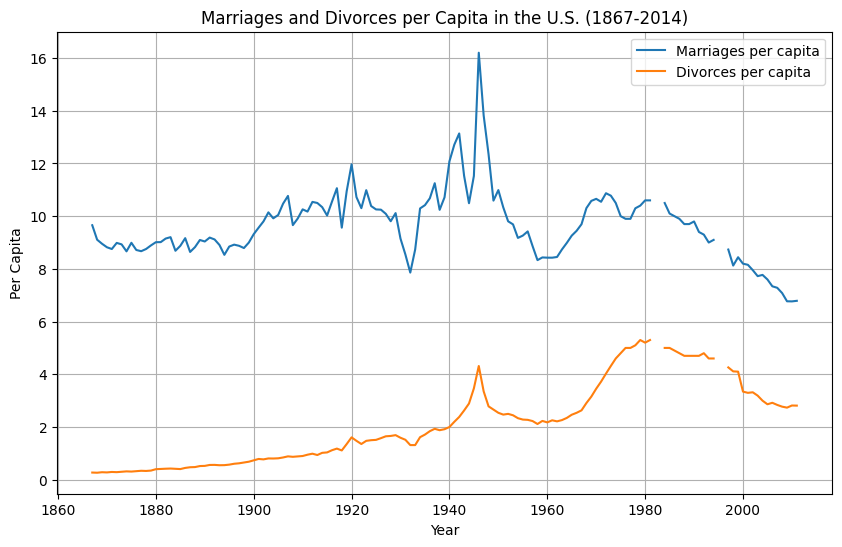

In [ ]:
# Define column headings
columns = ["Year", "Marriages", "Divorces", "Population"]

# Create a Pandas DataFrame


# Calculate marriages and divorces per capita
marriage_data["Marriages_per_capita"] = marriage_data["Marriages"] / marriage_data["Population"] * 1000
marriage_data["Divorces_per_capita"] = marriage_data["Divorces"] / marriage_data["Population"] * 1000

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(marriage_data["Year"], marriage_data["Marriages_per_capita"], label="Marriages per capita")
plt.plot(marriage_data["Year"], marriage_data["Divorces_per_capita"], label="Divorces per capita")

plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Marriages and Divorces per Capita in the U.S. (1867-2014)")
plt.legend()

plt.grid(True)
plt.show()


#**Question 7**

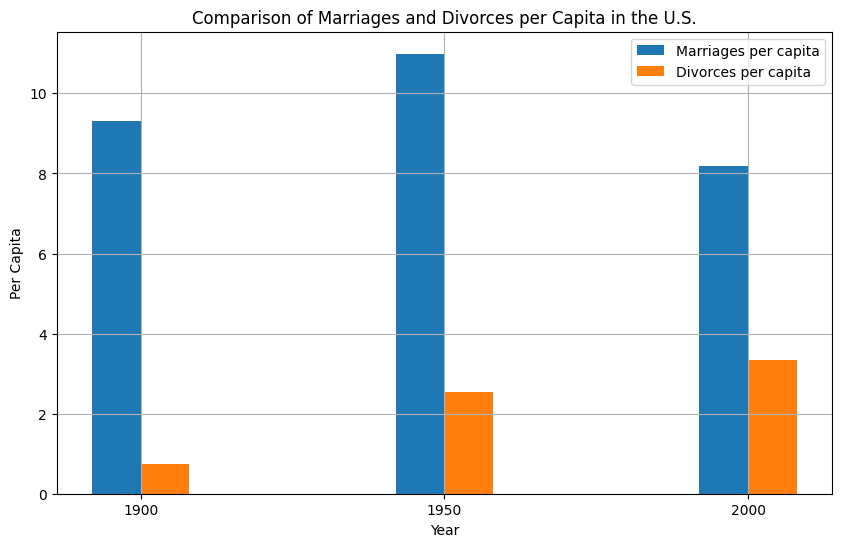

In [ ]:
# Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

# Calculate marriages and divorces per capita
vertical_data = marriage_data[marriage_data['Year'].isin([1900,1950,2000])].copy()
vertical_data["Marriages_per_capita"] = vertical_data["Marriages"] / vertical_data["Population"] * 1000
vertical_data["Divorces_per_capita"] = vertical_data["Divorces"] / vertical_data["Population"] * 1000

# Plotting
plt.figure(figsize=(10, 6))

years =  vertical_data["Year"]
marriages_per_capita = vertical_data["Marriages_per_capita"]
divorces_per_capita = vertical_data["Divorces_per_capita"]

plt.bar(years - 4, marriages_per_capita, width=8, label="Marriages per capita")
plt.bar(years + 4 , divorces_per_capita, width=8, label="Divorces per capita")

plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Comparison of Marriages and Divorces per Capita in the U.S.")
plt.xticks(years)
plt.legend()

plt.grid(True)
plt.show()

#**Question 8**

In [ ]:
# Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sortthe actors by their kill count and label each bar with the corresponding actor's name.Don't forget to label your axes!

actor_kill = pd.read_csv('actor_kill_counts.csv')
actor_kill.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


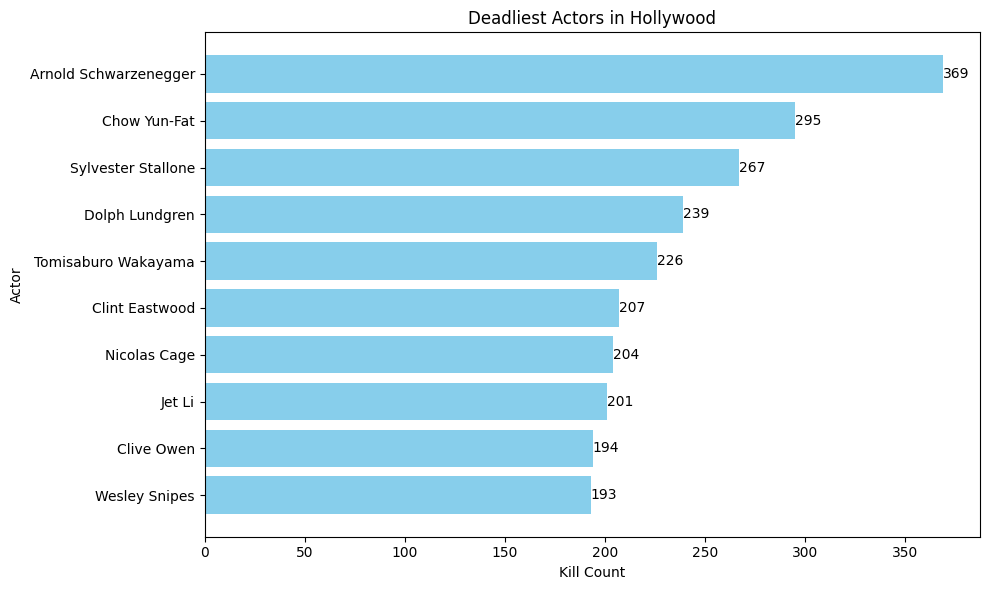

In [ ]:
actor_kill = actor_kill.sort_values(by='Count', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(actor_kill['Actor'], actor_kill['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest kill count at the top

# Label each bar with actor's name and kill count
for index, value in enumerate(actor_kill['Count']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()

#**Question 9**

In [ ]:
# Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
# Make sure that the pie chart is an even circle, labels the categories, and shows thepercentage breakdown of the categories.

romans = pd.read_csv('roman-emperor-reigns.csv')
romans.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


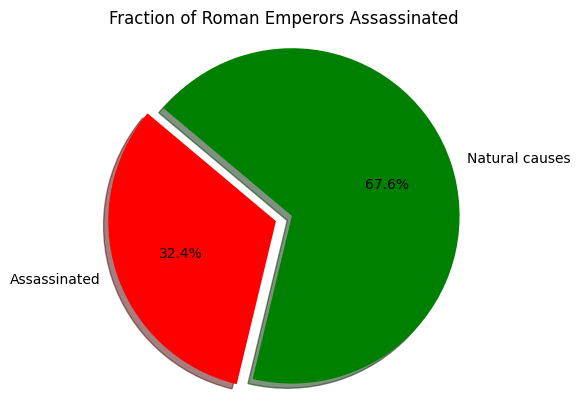

In [ ]:
total_emperors = len(romans)
assassinated_emperors = len(romans[romans['Cause_of_Death'] == 'Assassinated'])
percentage_assassinated = (assassinated_emperors / total_emperors) * 100

# Create the pie chart
labels = ['Assassinated', 'Natural causes']
sizes = [percentage_assassinated, 100 - percentage_assassinated]
colors = ['red', 'green']
explode = (0.1, 0)  # Explode the first slice (assassinated)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fraction of Roman Emperors Assassinated')
plt.show()

#**Question 10**

In [ ]:
# Create a scatter plot showing the relationship between the total revenue earned byarcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
# Don't forget to label your axes!
# Color each dot according to its year.

arcade_vs_doctrates = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_vs_doctrates.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


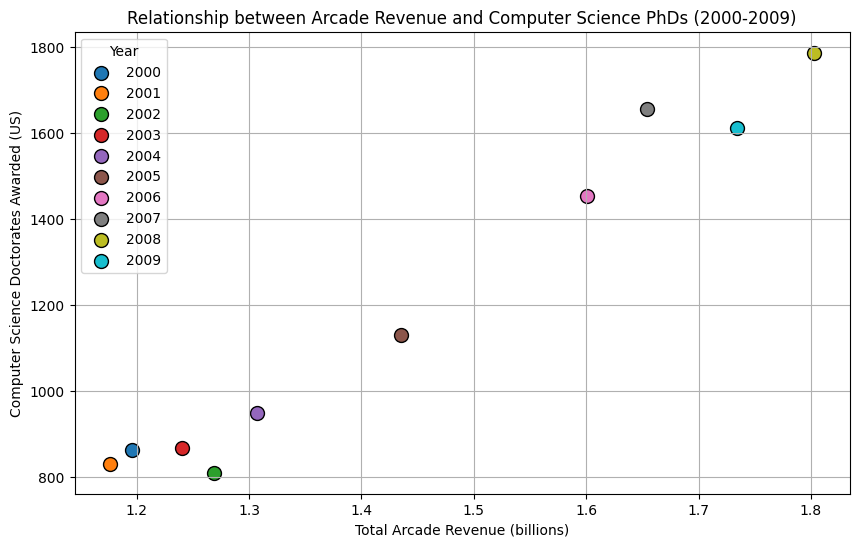

In [ ]:
plt.figure(figsize=(10, 6))
for year in arcade_vs_doctrates["Year"]:
    year_data = arcade_vs_doctrates[arcade_vs_doctrates["Year"] == year]
    plt.scatter(
        year_data["Total Arcade Revenue (billions)"],
        year_data["Computer Science Doctorates Awarded (US)"],
        label=str(year),
        edgecolors="black",
        s=100
    )

# Add labels and title
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")
plt.title("Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)")
plt.legend(title="Year")

# Show the plot
plt.grid(True)
plt.show()